In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np4

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [3]:
data = pd.read_csv('./FASHION/fashion-mnist_train.csv')

In [4]:
data.shape

(60000, 785)

In [5]:
class_name = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


In [6]:
def display_image(features, current_label):
    print("label : ",class_name[current_label] )
    plt.imshow(features.reshape(28,28))

In [7]:
X = data[data.columns[1:]]
y= data['label']

In [8]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

## DISPLAY

In [10]:
X.loc[5].values[:10]

array([0, 0, 0, 5, 4, 5, 5, 3, 5, 6], dtype=int64)

In [11]:
y.loc[5]

4

label :  Coat


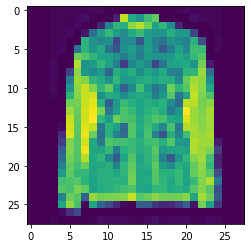

In [12]:
display_image(X.loc[5].values, y.loc[5])

label :  Bag


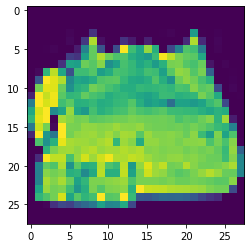

In [13]:
display_image(X.loc[100].values, y.loc[100])

label :  Coat


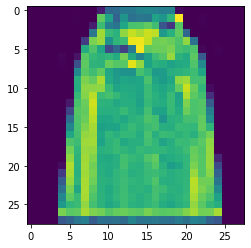

In [14]:
display_image(X.loc[77].values, y.loc[77])

In [15]:
# plt.figure(figsize=(20,4))

# for i in range(5):
#     image = np.reshape(X_train.iloc[i].to_numpy(), (28,28))  
#     label = label_map[i]
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(image, cmap=plt.cm.gray)
#     plt.title('Training: {}'.format(label))

## Normalisation

In [16]:
X = X/255

In [16]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## Spliting the data into train and validation set

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size =0.2)

## shape of training and validation set

In [18]:
X_train.shape, y_train.shape

((48000, 784), (48000,))

In [19]:
X_val.shape, y_val.shape

((12000, 784), (12000,))

In [20]:
model = LogisticRegression(solver='sag', multi_class='auto', max_iter=1000).fit(X_train, y_train)

In [34]:
y_val_pred = model.predict(X_val)
y_pred = model.predict(X_train)

In [35]:
def summarizing(y_val, y_pred, avg_methode = "weighted"):
    acc = accuracy_score(y_val, y_pred, normalize=True)
    num_acc = accuracy_score(y_val, y_pred, normalize=True)
    
    prec = precision_score(y_val, y_pred, average=avg_methode)
    recall = recall_score(y_val, y_pred, average=avg_methode)
    
    
    print("val data count", len(y_val))
    print("accuracy_count", num_acc)
    print("accuracy_score : ", acc)
    print("precision_socre : ", prec)
    print("recall_score : ", recall)
    

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.81      0.82      0.82      1228
     Trouser       0.97      0.96      0.96      1202
    Pullover       0.77      0.74      0.76      1258
       Dress       0.85      0.88      0.86      1205
        Coat       0.73      0.77      0.75      1184
      Sandal       0.95      0.94      0.94      1226
       Shirt       0.64      0.60      0.62      1184
     Sneaker       0.92      0.94      0.93      1172
         Bag       0.93      0.94      0.94      1153
  Ankle Boot       0.95      0.95      0.95      1188

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [24]:
summarizing(y_val, y_val_pred)

val data count 12000
accuracy_count 0.8523333333333334
accuracy_score :  0.8523333333333334
precision_socre :  0.8515181477014167
recall_score :  0.8523333333333334


In [25]:
summarizing(y_train,y_pred )

val data count 48000
accuracy_count 0.8839791666666666
accuracy_score :  0.8839791666666666
precision_socre :  0.8830570559173301
recall_score :  0.8839791666666666


In [26]:
print(classification_report(y_train, y_pred, target_names=classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.83      0.86      0.84      4772
     Trouser       0.99      0.98      0.98      4798
    Pullover       0.79      0.78      0.79      4742
       Dress       0.88      0.90      0.89      4795
        Coat       0.79      0.81      0.80      4816
      Sandal       0.97      0.96      0.96      4774
       Shirt       0.71      0.65      0.68      4816
     Sneaker       0.94      0.95      0.95      4828
         Bag       0.97      0.97      0.97      4847
  Ankle Boot       0.97      0.97      0.97      4812

    accuracy                           0.88     48000
   macro avg       0.88      0.88      0.88     48000
weighted avg       0.88      0.88      0.88     48000



## Confusion matrix

In [27]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [28]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_val, y_val_pred)

conf = pd.DataFrame(confusion_mtx, columns = classes, index = classes)

In [29]:
conf

,T-shirt/Top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle Boot
T-shirt/Top,1013,7,14,50,9,3,117,0,14,1
Trouser,3,1151,5,31,4,0,4,0,4,0
Pullover,21,3,931,9,164,0,115,0,15,0
Dress,40,15,13,1058,42,0,31,0,6,0
Coat,3,3,108,38,908,0,117,0,7,0
Sandal,1,1,0,1,0,1149,0,38,7,29
Shirt,168,6,124,56,110,0,705,0,15,0
Sneaker,0,0,0,0,0,40,0,1103,5,24
Bag,8,0,12,8,8,7,18,4,1087,1
Ankle Boot,0,3,0,0,0,10,0,49,3,1123


<AxesSubplot:>

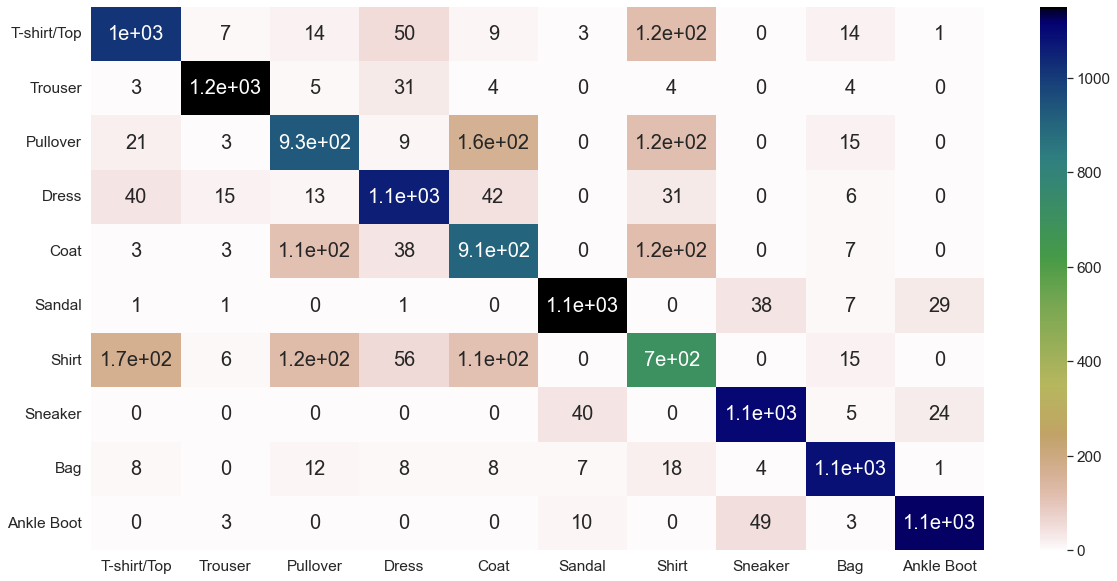

In [30]:
import seaborn as sn

plt.figure(figsize = (20,10))
sn.set(font_scale=1.4)
sn.heatmap(conf, cmap="gist_earth_r", annot=True,annot_kws={"size": 20})# font size


## Test Set

In [31]:
data_test = pd.read_csv('./FASHION/fashion-mnist_test.csv')

In [32]:
y_test = data_test['label']
X_test = data_test[data_test.columns[1:]]

y_test_pred = model.predict(X_test)

## score

              precision    recall  f1-score   support

 T-shirt/Top       0.84      0.73      0.78      1000
     Trouser       0.84      0.99      0.91      1000
    Pullover       0.79      0.60      0.68      1000
       Dress       0.93      0.72      0.81      1000
        Coat       0.49      0.96      0.65      1000
      Sandal       1.00      0.50      0.67      1000
       Shirt       0.65      0.29      0.40      1000
     Sneaker       0.88      0.73      0.80      1000
         Bag       0.83      0.95      0.89      1000
  Ankle Boot       0.66      1.00      0.79      1000

    accuracy                           0.75     10000
   macro avg       0.79      0.75      0.74     10000
weighted avg       0.79      0.75      0.74     10000



## confusion matrix

<AxesSubplot:>

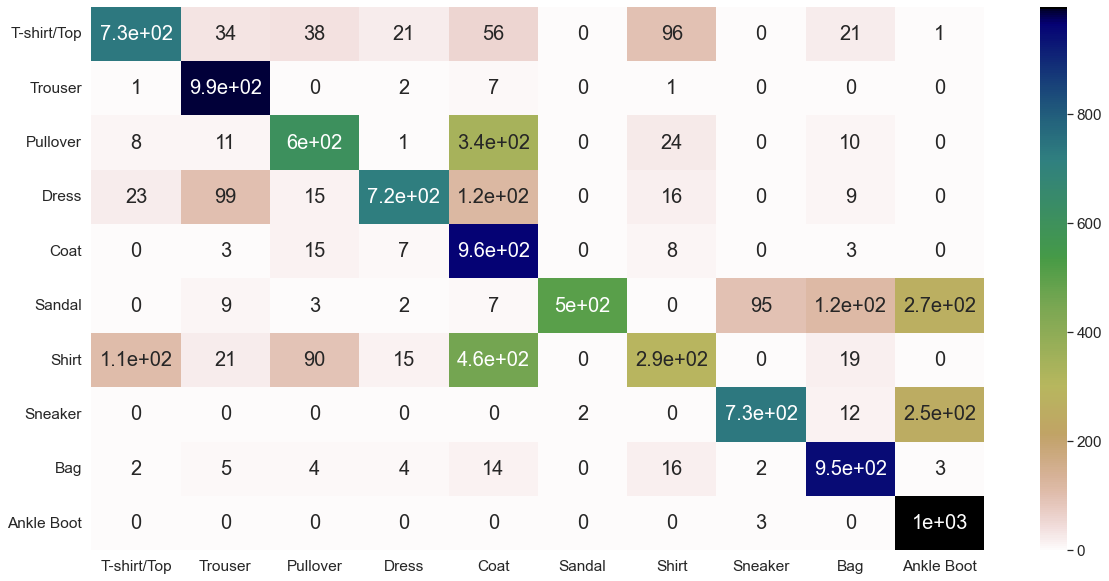

In [36]:
import seaborn as sn

confusion_mtx = confusion_matrix(y_test, y_test_pred)

conf = pd.DataFrame(confusion_mtx, columns = classes, index = classes)
plt.figure(figsize = (20,10))
sn.set(font_scale=1.4)
sn.heatmap(conf, cmap="gist_earth_r", annot=True,annot_kws={"size": 20})# font size


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
model_g = LogisticRegression()

# Define the hyperparameters to try
hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model_g, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("hyperparameters : ",grid_search.best_params_)

# Train a new logistic regression model using the best hyperparameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the performance of the final model on the test set
test_accuracy = best_model.score(X_test, y_test)
print('Test accuracy:', test_accuracy)


c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
